# <u>Face Emotion Recognition</u>

## Project Introduction

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms.

One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention.

Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance.

While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines which can work for you. It provides data in the form of video, audio, and texts which can be analysed using deep learning algorithms.

Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

### Implementation details

Deep Neural Networks (DNNs) outperform traditional models in numerous optical recognition missions containing Facial Expression Recognition (FER) which is an imperative process in next-generation Human-Machine Interaction (HMI) for clinical practice and behavioral description. <br/><br/> Existing FER methods do not have high accuracy and are not sufficient practical in real-time applications. This work proposes a Hybrid Convolution-Recurrent Neural Network method for FER in Images.<br/><br/> The proposed network architecture consists of Convolution layers followed by Recurrent Neural Network (RNN) which the combined model extracts the relations within facial images and by using the recurrent network the temporal dependencies which exist in the images can be considered during the classification.<br/><br/> The proposed hybrid model is evaluated based on two public datasets and Promising experimental results have been obtained as compared to the state-of-the-art methods.

In [1]:
# Importing all the required Libraries

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential                                                            
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization,Activation, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras import Model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras import regularizers
import seaborn as sns
import numpy as np 
import pandas as pd
#import cv2
import os

# Removing all those annoying Warnings

import warnings                                                                                
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Importing the required dataset 

In our dataset we have total 7 featured that has to be classified
- Happy
- Sad
- Surprise
- Disgust
- Neutral
- Fear
- Angry

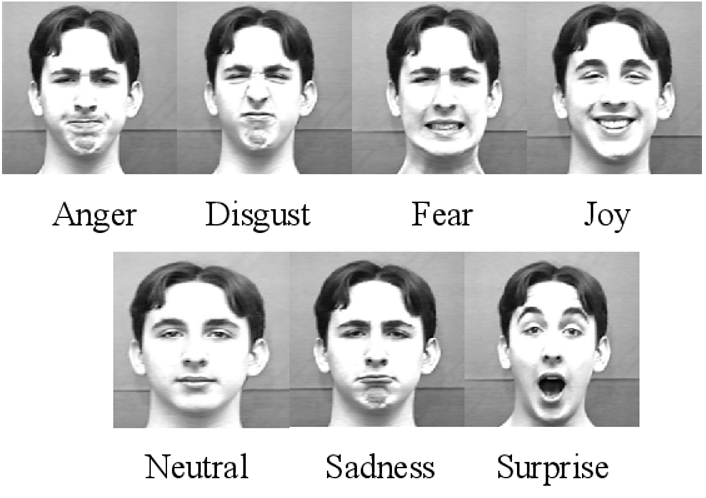

In [2]:
#Importing the path 
my_data = "dataset/"

In [3]:
#Let's confirm if we can access train and test folders 
os.listdir(my_data)

['test', 'train']

In [4]:
#Creating actual path to import the dataset
train_path = my_data + '/train'
test_path = my_data + '/test'

In [5]:
#Let's check all sorts of features once again for training dataset
print('Train data items')
os.listdir(train_path)

Train data items


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [6]:
#Let's check all sorts of features once again for test dataset

print('Test data items')
os.listdir(test_path)

Test data items


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

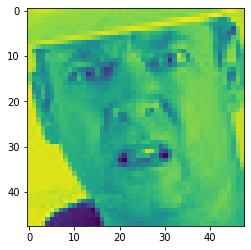

In [7]:
# Checking verious folders

for i in range(5):
    img = os.listdir(train_path+'/angry')[i]
    img = train_path+'/angry'+'/' + img
    
    #showing the first image of angry folder
    plt.imshow(imread(img))

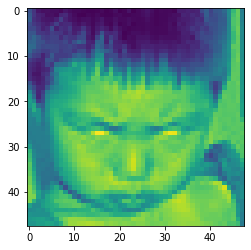

In [8]:
#getting the first image of angry folder
os.listdir(train_path+'/angry')[0]
img =train_path+'/angry'+'/Training_10118481.jpg'

#showing the first image of angry folder
plt.imshow(imread(img))

## Data Visualization
The dataset consists of 2 folders - training and test All the images of dataset are grayscale images of size 48,48 Both these folders consist of 7 folders each.All these 7 folders contain images of peoples faces with respective emotion. We deleted 2 folders out of 7 which consisted of least numbers of images so that our model can train better on other model and give better accuracy. (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains approximately 36K images.
<br/><br/>
Dataset is converted into raw images and splitted in multiple folders which are train and validation folders. 80% of our images are contained inside the train folder, and the last 20% are inside the validation folder.

In [9]:
#define a function to plot some images from different classes

def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='Blues_r') 

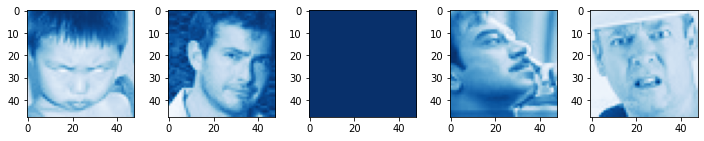

In [10]:
#sample of angry class
plot_images(train_path+'/angry')

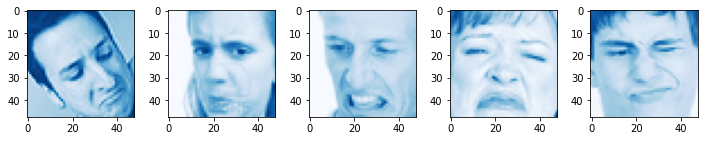

In [11]:
#sample of disgust class
plot_images(train_path+'/disgust')

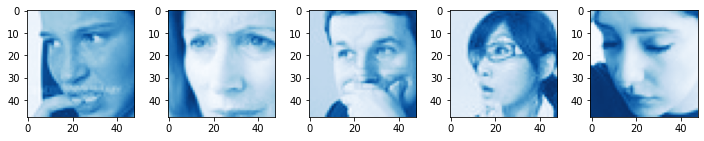

In [12]:
#sample of fear class
plot_images(train_path+'/fear')

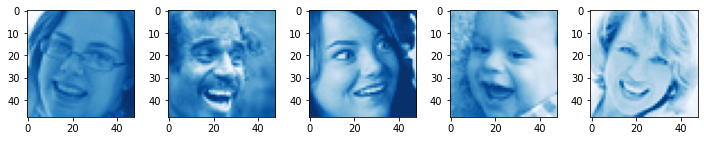

In [13]:
#sample of happy class
plot_images(train_path+'/happy')

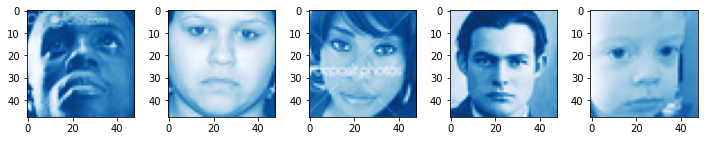

In [14]:
#sample of neutral class
plot_images(train_path+'/neutral')

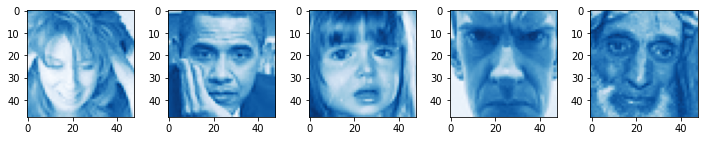

In [15]:
#sample of sad class
plot_images(train_path+'/sad')

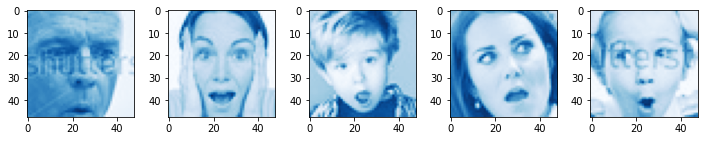

In [16]:
#sample of surprise class
plot_images(train_path+'/surprise')

In [17]:
 # Create your dictionary class
class my_dictionary(dict):
  
    # __init__ function
    def __init__(self):
        self = dict()
          
    # Function to add key:value
    def add(self, key, value):
        self[key] = value

In [18]:
dict_obj = my_dictionary()
lst1 = []
lst = []
for expression in os.listdir(train_path):
    print(str(len(os.listdir(train_path +'/'+expression))) + " " + expression + " images")
    dict_obj.add(expression,len(os.listdir(train_path +'/'+expression)))
    lst1.append(expression)
    lst.append(len(os.listdir(train_path +'/'+expression)))

3995 angry images
436 disgust images
4097 fear images
7215 happy images
4965 neutral images
4830 sad images
3171 surprise images


The dataset consists of 2 folders - training and test All the images of dataset are grayscale images of size 48*48. Both these folders consist of 7 folders each.(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains approximately 36K images

Dataset is converted into raw images and splitted in multiple folders which are train and validation folders. 80% of our images are contained inside the train folder, and the last 20% are inside the validation folder.

In [19]:
df = pd.DataFrame(list(zip(lst1, lst)),
columns=['Emotion','Count Images'])
df

,Emotion,Count Images
0,angry,3995
1,disgust,436
2,fear,4097
3,happy,7215
4,neutral,4965
5,sad,4830
6,surprise,3171


In [20]:
df = df.sort_values(by=['Count Images'])

Text(0.5, 1.0, 'Count of images vs emotion')

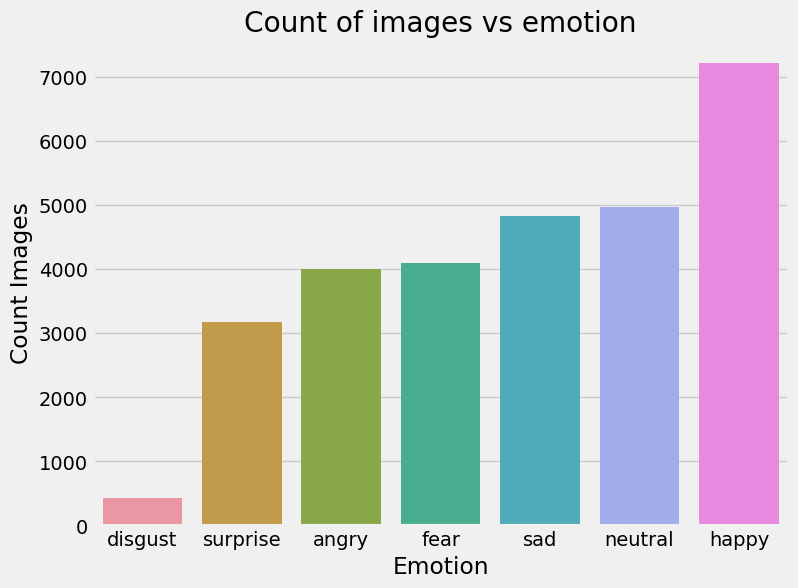

In [21]:
plt.style.use('fivethirtyeight')
plt.figure(dpi=100, figsize=(8,6))
sns.barplot(x=df['Emotion'], y=df['Count Images'])
plt.title('Count of images vs emotion')

------------------------------------------------------------------------------------------------

## Setup the data generators
Now we will generate training and testing (validation) batches.

## Image Manipulation
Its usually a good idea to manipulate the images with scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us

## Data Generators for ResNet

Recent years have seen tremendous progress in the field of Image Processing and Recognition. Deep Neural Networks are becoming deeper and more complex. It has been proved that adding more layers to a Neural Network can make it more robust for image-related tasks. But it can also cause them to lose accuracy. That’s where Residual Networks come into place.
<br/><br/>
The tendency to add so many layers by deep learning practitioners is to extract important features from complex images. So, the first layers may detect edges, and the subsequent layers at the end may detect recognizable shapes, like tires of a car. But if we add more than 30 layers to the network, then its performance suffers and it attains a low accuracy. This is contrary to the thinking that the addition of layers will make a neural network better. This is not due to overfitting, because in that case, one may use dropout and regularization techniques to solve the issue altogether. It’s mainly present because of the popular vanishing gradient problem.

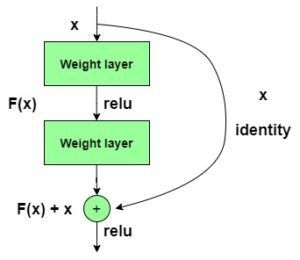

In [22]:
img_size = 48
batch_size = 32

# selecting colour mode as rgb as resnet is trained on rgb photos and we have grascaled images
datagen_train = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8,1.2],rescale=1./255)
train_generator = datagen_train.flow_from_directory(train_path,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  color_mode='rgb',
                                                  class_mode='categorical')

datagen_validation = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8,1.2],rescale=1./255)
validation_generator = datagen_train.flow_from_directory(test_path,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  color_mode='rgb',
                                                  class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [23]:
#using pretrained model, RESNET50 architecture
from tensorflow.keras.applications.resnet50 import ResNet50
# creating a base model using resnet and loading the pretrained weights
base_model = ResNet50(input_shape=(48,48,3),include_top = False, weights = 'imagenet')
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 12, 12, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 12, 12, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 12, 12, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 12, 12, 256)  1024       ['conv2_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 6, 6, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 6, 6, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 6, 6, 512)    66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 6, 6, 512)   2048        ['conv3_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 3, 3, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 3, 3, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 3, 3, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, 3, 3, 1024)  4096        ['conv4_block2_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 3, 3, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 3, 3, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 3, 3, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 2, 2, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 2, 2, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 2, 2, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_blo

In [24]:
# making all the layers except last 4 layers non trainable 
for layer in base_model.layers[:-4]:
    layer.trainable = False
# Build model on the top of base model
model = Sequential()

model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())

#Fully connected 1st layer
model.add(Dense(512,kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(256,kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.25))

#output layer
model.add(Dense(7, activation='softmax'))
# Final model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 dropout (Dropout)           (None, 2, 2, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 batch_normalization (BatchN  (None, 8192)             32768     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                        

In [25]:
# compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
epochs=50
steps_per_epoch=train_generator.n//train_generator.batch_size
steps_per_epoch

897

In [27]:
validation_steps=validation_generator.n//validation_generator.batch_size
validation_steps

224

In [28]:
# this decreases the learning rate if the model loss does not decrease 
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=10, min_lr=0.00001, mode='auto')
# to save model weights 
checkpoint = ModelCheckpoint("model_weights_resnet.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
early_stopping=EarlyStopping(monitor='val_loss',
                            min_delta=0,
                            patience=10,
                            verbose=1,
                            restore_best_weights=True)
callbacks = [checkpoint, reduce_lr,early_stopping]

In [29]:
# Fitting the model 
history = model.fit(
    x=train_generator,
    batch_size=batch_size,
    epochs=epochs,
    validation_data = validation_generator,
    callbacks=callbacks,
    verbose=1)

Epoch 1/50
898/898 [==============================] - ETA: 0s - loss: 1.8586 - accuracy: 0.2718
Epoch 1: saving model to model_weights_resnet.h5
898/898 [==============================] - 132s 144ms/step - loss: 1.8586 - accuracy: 0.2718 - val_loss: 1.7670 - val_accuracy: 0.2754 - lr: 0.0010
Epoch 2/50
898/898 [==============================] - ETA: 0s - loss: 1.7291 - accuracy: 0.3128
Epoch 2: saving model to model_weights_resnet.h5
898/898 [==============================] - 130s 145ms/step - loss: 1.7291 - accuracy: 0.3128 - val_loss: 1.8973 - val_accuracy: 0.2744 - lr: 0.0010
Epoch 3/50
898/898 [==============================] - ETA: 0s - loss: 1.6914 - accuracy: 0.3253
Epoch 3: saving model to model_weights_resnet.h5
898/898 [==============================] - 132s 147ms/step - loss: 1.6914 - accuracy: 0.3253 - val_loss: 1.9729 - val_accuracy: 0.2632 - lr: 0.0010
Epoch 4/50
898/898 [==============================] - ETA: 0s - loss: 1.6725 - accuracy: 0.3354
Epoch 4: saving model to 

Epoch 29/50
898/898 [==============================] - ETA: 0s - loss: 1.5280 - accuracy: 0.4033
Epoch 29: saving model to model_weights_resnet.h5
898/898 [==============================] - 135s 150ms/step - loss: 1.5280 - accuracy: 0.4033 - val_loss: 1.6249 - val_accuracy: 0.3720 - lr: 0.0010
Epoch 30/50
898/898 [==============================] - ETA: 0s - loss: 1.5223 - accuracy: 0.4065
Epoch 30: saving model to model_weights_resnet.h5
898/898 [==============================] - 160s 179ms/step - loss: 1.5223 - accuracy: 0.4065 - val_loss: 1.5965 - val_accuracy: 0.3699 - lr: 0.0010
Epoch 31/50
898/898 [==============================] - ETA: 0s - loss: 1.5181 - accuracy: 0.4078
Epoch 31: saving model to model_weights_resnet.h5
898/898 [==============================] - 155s 173ms/step - loss: 1.5181 - accuracy: 0.4078 - val_loss: 1.6061 - val_accuracy: 0.3709 - lr: 0.0010
Epoch 32/50
898/898 [==============================] - ETA: 0s - loss: 1.5134 - accuracy: 0.4099
Epoch 32: saving m

## Plotting Accuracy & Loss to analyze the results

In [30]:
# saving the history of the model in data frame 
df=pd.DataFrame(model.history.history)

<AxesSubplot:>

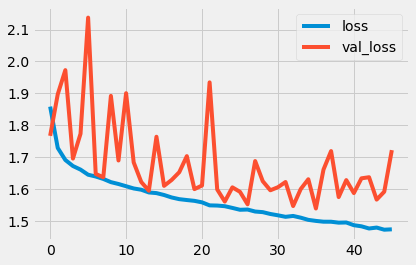

In [31]:
#Plotting Loss
df[['loss','val_loss']].plot()

<AxesSubplot:>

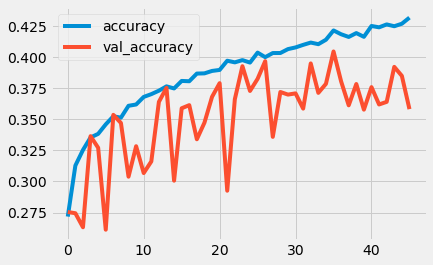

In [32]:
#Plotting accuracy
df[['accuracy','val_accuracy']].plot()

As the accuracy of the model is very poor so we can not use in the project.

## Data Generators for our custom CNN model

In [33]:
# Creating Image generators, for all train, validation, and test set
training_gen=ImageDataGenerator(rescale=1./255)
testing_gen=ImageDataGenerator(rescale=1./255)

In [34]:
# Creating  Training Dataset

train_gen=training_gen.flow_from_directory(train_path,                
                                           target_size=(48,48),
                                           batch_size=32,
                                           color_mode='grayscale',
                                           class_mode='categorical')

# Creating Test Set

test_gen=testing_gen.flow_from_directory(test_path,                                       
                                           target_size=(48,48),  
                                           batch_size=32,
                                           color_mode='grayscale',
                                           class_mode='categorical',
                                           shuffle= False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [35]:
#printing the class indicies og train_gen
print(train_gen.class_indices)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


## Building the CNN Model
We chose to use a Convolutional Neural Network in order to tackle this face recognition problem. Indeed this type of Neural Network (NN) is good for extracting the features of images and is widely used for image analysis subjects like image classification.

In [36]:
# from keras.optimizers import Adam,SGD,RMSprop
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#output layer
model.add(Dense(no_of_classes, activation='softmax'))
opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_3 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout_3 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)      

## Train the model

In [37]:
# Adding various Call Backs Like Early stopping to prevent overfitting and Decay Learning Rate to prevent Overshooting

checkpoint = ModelCheckpoint('./my_model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')          # Adding various Call Backs Like Early stopping to prevent overfitting and Decay Learning Rate to prevent Overshooting

#early stopping

early_stopping=EarlyStopping(monitor='val_loss',
                            min_delta=0,
                            patience=5,
                            verbose=1,
                            restore_best_weights=True)
decay_lr= ReduceLROnPlateau(monitor='val_loss',
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)
callbacks=[early_stopping,checkpoint,decay_lr]

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [38]:
#fitting the generator

results = model.fit_generator(generator=train_gen,
                                steps_per_epoch=train_gen.n//train_gen.batch_size,
                                epochs=40,
                                validation_data = test_gen,
                                validation_steps = test_gen.n//test_gen.batch_size,
                                callbacks=callbacks
                                )

Epoch 1/40
897/897 [==============================] - 338s 376ms/step - loss: 1.7261 - accuracy: 0.3310 - val_loss: 1.5757 - val_accuracy: 0.3899 - lr: 0.0010
Epoch 2/40
897/897 [==============================] - 364s 406ms/step - loss: 1.3617 - accuracy: 0.4774 - val_loss: 1.3038 - val_accuracy: 0.5042 - lr: 0.0010
Epoch 3/40
897/897 [==============================] - 370s 413ms/step - loss: 1.2439 - accuracy: 0.5265 - val_loss: 1.3499 - val_accuracy: 0.4735 - lr: 0.0010
Epoch 4/40
897/897 [==============================] - 406s 452ms/step - loss: 1.1747 - accuracy: 0.5542 - val_loss: 1.3172 - val_accuracy: 0.4891 - lr: 0.0010
Epoch 5/40
897/897 [==============================] - ETA: 0s - loss: 1.1192 - accuracy: 0.5769WARNING:tensorflow:Can save best model only with val_acc available, skipping.

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
897/897 [==============================] - 3443s 4s/step - loss: 1.1192 - accuracy: 0.5769 - val_loss: 1.4090 - v

## Building CNN model with ResNet

In [39]:
#using pretrained model, RESNET50 architecture
from tensorflow.keras.applications.resnet50 import ResNet50

In [40]:
# creating a base model using resnet and loading the pretrained weights
base_model = ResNet50(input_shape=(48,48,3),include_top = False, weights = 'imagenet')
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 12, 12, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 12, 12, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 12, 12, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 12, 12, 256)  1024       ['conv2_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 6, 6, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 6, 6, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 6, 6, 512)    66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 6, 6, 512)   2048        ['conv3_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 3, 3, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 3, 3, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 3, 3, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, 3, 3, 1024)  4096        ['conv4_block2_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 3, 3, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 3, 3, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 3, 3, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 2, 2, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 2, 2, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 2, 2, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_blo

In [41]:
# making all the layers except last 4 layers non trainable 
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [42]:
# Build model on the top of base model
model = Sequential()

model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())

#Fully connected 1st layer
model.add(Dense(512,kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(256,kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.25))

#output layer
model.add(Dense(7, activation='softmax'))

In [43]:
# Final model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 dropout_9 (Dropout)         (None, 2, 2, 2048)        0         
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization_9 (Batc  (None, 8192)             32768     
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 512)               4194816   
                                                                 
 batch_normalization_10 (Bat  (None, 512)              2048      
 chNormalization)                                     

In [44]:
# compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
epochs=50
steps_per_epoch=train_generator.n//train_generator.batch_size
steps_per_epoch

897

In [46]:
validation_steps=validation_generator.n//validation_generator.batch_size
validation_steps

224

In [47]:
# this decreases the learning rate if the model loss does not decrease 
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=10, min_lr=0.00001, mode='auto')
# to save model weights 
checkpoint = ModelCheckpoint("model_weights_resnet.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
early_stopping=EarlyStopping(monitor='val_loss',
                            min_delta=0,
                            patience=10,
                            verbose=1,
                            restore_best_weights=True)
callbacks = [checkpoint, reduce_lr,early_stopping]

In [48]:
# Fitting the model 
history = model.fit(
    x=train_generator,
    batch_size=batch_size,
    epochs=epochs,
    validation_data = validation_generator,
    callbacks=callbacks,
    verbose=1)

Epoch 1/50
898/898 [==============================] - ETA: 0s - loss: 1.8625 - accuracy: 0.2683
Epoch 1: saving model to model_weights_resnet.h5
898/898 [==============================] - 144s 157ms/step - loss: 1.8625 - accuracy: 0.2683 - val_loss: 1.9609 - val_accuracy: 0.2868 - lr: 0.0010
Epoch 2/50
898/898 [==============================] - ETA: 0s - loss: 1.7321 - accuracy: 0.3132
Epoch 2: saving model to model_weights_resnet.h5
898/898 [==============================] - 142s 158ms/step - loss: 1.7321 - accuracy: 0.3132 - val_loss: 1.7796 - val_accuracy: 0.3002 - lr: 0.0010
Epoch 3/50
898/898 [==============================] - ETA: 0s - loss: 1.6883 - accuracy: 0.3285
Epoch 3: saving model to model_weights_resnet.h5
898/898 [==============================] - 141s 157ms/step - loss: 1.6883 - accuracy: 0.3285 - val_loss: 1.9481 - val_accuracy: 0.2371 - lr: 0.0010
Epoch 4/50
898/898 [==============================] - ETA: 0s - loss: 1.6707 - accuracy: 0.3348
Epoch 4: saving model to 

Epoch 29/50
898/898 [==============================] - ETA: 0s - loss: 1.5229 - accuracy: 0.4068
Epoch 29: saving model to model_weights_resnet.h5
898/898 [==============================] - 143s 159ms/step - loss: 1.5229 - accuracy: 0.4068 - val_loss: 1.6450 - val_accuracy: 0.3629 - lr: 0.0010
Epoch 30/50
898/898 [==============================] - ETA: 0s - loss: 1.5232 - accuracy: 0.4037
Epoch 30: saving model to model_weights_resnet.h5
898/898 [==============================] - 143s 159ms/step - loss: 1.5232 - accuracy: 0.4037 - val_loss: 1.5915 - val_accuracy: 0.3809 - lr: 0.0010
Epoch 31/50
898/898 [==============================] - ETA: 0s - loss: 1.5172 - accuracy: 0.4115
Epoch 31: saving model to model_weights_resnet.h5
898/898 [==============================] - 142s 159ms/step - loss: 1.5172 - accuracy: 0.4115 - val_loss: 1.5876 - val_accuracy: 0.3823 - lr: 0.0010
Epoch 32/50
898/898 [==============================] - ETA: 0s - loss: 1.5145 - accuracy: 0.4143
Epoch 32: saving m

## Plotting Accuracy & Loss to analyze the results

<AxesSubplot:>

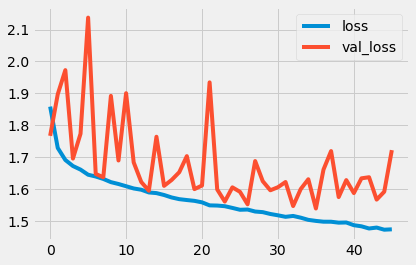

In [49]:
#Plotting Loss
df[['loss','val_loss']].plot()

<AxesSubplot:>

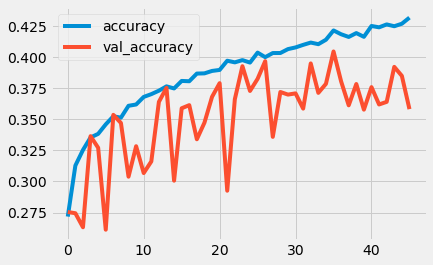

In [50]:
#Plotting accuracy
df[['accuracy','val_accuracy']].plot()

The model accuracy is very poor we won't use this model for our project

## Data Generators for our custom CNN model

In [51]:
# Creating Image generators, for all train, validation, and test set
training_gen=ImageDataGenerator(rescale=1./255)
testing_gen=ImageDataGenerator(rescale=1./255)

In [52]:
# Creating  Training Dataset

train_gen=training_gen.flow_from_directory(train_path,                
                                           target_size=(48,48),
                                           batch_size=32,
                                           color_mode='grayscale',
                                           class_mode='categorical')

# Creating Test Set

test_gen=testing_gen.flow_from_directory(test_path,                                       
                                           target_size=(48,48),  
                                           batch_size=32,
                                           color_mode='grayscale',
                                           class_mode='categorical',
                                           shuffle= False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [53]:
#printing the class indicies og train_gen
print(train_gen.class_indices)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


- Deep learning models are trained by being fed with batches of data. Keras has a very useful class to automatically feed data from a directory: ImageDataGenerator. 
- As of now we have imported libraries, got dataset, and created train and test images.

## Building the custom CNN Model.
We chose to use a Convolutional Neural Network in order to tackle this face recognition problem. Indeed this type of Neural Network (NN) is good for extracting the features of images and is widely used for image analysis subjects like image classification.
<br><br>
Now let's define the architecture of our CNN:

In [54]:
# from keras.optimizers import Adam,SGD,RMSprop
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#output layer
model.add(Dense(no_of_classes, activation='softmax'))
opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_12 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

We define our CNN with the following global architecture:
<br><br>
- 4 convolutional layers
- 2 fully connected layers
<br><br>
Basic CNN architecture details:
<br>
- **Input layer** - Input layer in CNN should contain image data
- **Convo layer**  Convo layer is sometimes called feature extractor layer because features of the image are get extracted within this layer
- **Pooling layer** - Pooling is used to reduce the dimensionality of each features while retaining the most important information. It is used between two convolution layer
- **Fully CL** - Fully connected layer involves weights, biases, and neurons. It connects neurons in one layer to neurons in another layer. It is used to classify images between different category by training and placed before the output layer
- **Output Layer**- Output layer contains the label which is in the form of one-hot encoded
Also we use some common techniques for each layer
<br><br>
- **Batch normalization:** improves the performance and stability of NNs by providing inputs with zero mean and unit variance. Dropout: reduces overfitting by randomly not updating the weights of some nodes. This helps prevent the NN from relying on one node in the layer too much.

## Train the model
Now it’s time to train the model and evaluate the results.

In [55]:
# Adding various Call Backs Like Early stopping to prevent overfitting and Decay Learning Rate to prevent Overshooting
# This model is monitored on val_acc
checkpoint = ModelCheckpoint('./my_model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')          # Adding various Call Backs Like Early stopping to prevent overfitting and Decay Learning Rate to prevent Overshooting

#early stopping
early_stopping=EarlyStopping(monitor='val_acc',
                            min_delta=0,
                            patience=5,
                            verbose=1,
                            restore_best_weights=True)
decay_lr= ReduceLROnPlateau(monitor='val_acc',
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)
callbacks=[early_stopping,checkpoint,decay_lr]

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [56]:
#fitting the generator
# This model is monitered on val_loss comes with an accuracy of 80.17%
history = model.fit_generator(generator=train_gen,
                                steps_per_epoch=train_gen.n//train_gen.batch_size,
                                epochs=40,
                                validation_data = test_gen,
                                validation_steps = test_gen.n//test_gen.batch_size,
                                callbacks=callbacks
                                )

Epoch 1/40
897/897 [==============================] - 294s 327ms/step - loss: 1.7161 - accuracy: 0.3392 - val_loss: 1.7070 - val_accuracy: 0.3679 - lr: 0.0010
Epoch 2/40
897/897 [==============================] - 295s 329ms/step - loss: 1.3582 - accuracy: 0.4782 - val_loss: 1.4120 - val_accuracy: 0.4612 - lr: 0.0010
Epoch 3/40
897/897 [==============================] - 288s 321ms/step - loss: 1.2422 - accuracy: 0.5253 - val_loss: 1.3106 - val_accuracy: 0.4946 - lr: 0.0010
Epoch 4/40
897/897 [==============================] - 287s 320ms/step - loss: 1.1755 - accuracy: 0.5526 - val_loss: 1.2799 - val_accuracy: 0.5050 - lr: 0.0010
Epoch 5/40
897/897 [==============================] - 299s 334ms/step - loss: 1.1191 - accuracy: 0.5796 - val_loss: 1.2325 - val_accuracy: 0.5301 - lr: 0.0010
Epoch 6/40
897/897 [==============================] - 284s 317ms/step - loss: 1.0728 - accuracy: 0.5910 - val_loss: 1.1993 - val_accuracy: 0.5451 - lr: 0.0010
Epoch 7/40
897/897 [==========================

Epoch 14/40
897/897 [==============================] - 298s 332ms/step - loss: 0.6638 - accuracy: 0.7540 - val_loss: 1.1159 - val_accuracy: 0.6211 - lr: 0.0010
Epoch 15/40
897/897 [==============================] - 297s 331ms/step - loss: 0.6028 - accuracy: 0.7776 - val_loss: 1.1482 - val_accuracy: 0.6225 - lr: 0.0010
Epoch 16/40
897/897 [==============================] - 296s 330ms/step - loss: 0.5704 - accuracy: 0.7884 - val_loss: 1.1891 - val_accuracy: 0.6299 - lr: 0.0010
Epoch 17/40
897/897 [==============================] - 297s 332ms/step - loss: 0.5271 - accuracy: 0.8036 - val_loss: 1.1785 - val_accuracy: 0.6370 - lr: 0.0010
Epoch 18/40
897/897 [==============================] - 291s 324ms/step - loss: 0.4845 - accuracy: 0.8229 - val_loss: 1.2005 - val_accuracy: 0.6309 - lr: 0.0010
Epoch 19/40
897/897 [==============================] - 291s 324ms/step - loss: 0.4611 - accuracy: 0.8307 - val_loss: 1.2289 - val_accuracy: 0.6147 - lr: 0.0010
Epoch 20/40
897/897 [===================

Epoch 27/40
897/897 [==============================] - 288s 321ms/step - loss: 0.2811 - accuracy: 0.9008 - val_loss: 1.4425 - val_accuracy: 0.6370 - lr: 0.0010
Epoch 28/40
897/897 [==============================] - 291s 324ms/step - loss: 0.2859 - accuracy: 0.8969 - val_loss: 1.4309 - val_accuracy: 0.6184 - lr: 0.0010
Epoch 29/40
897/897 [==============================] - 285s 318ms/step - loss: 0.2763 - accuracy: 0.9020 - val_loss: 1.4818 - val_accuracy: 0.6405 - lr: 0.0010
Epoch 30/40
897/897 [==============================] - 285s 318ms/step - loss: 0.2610 - accuracy: 0.9081 - val_loss: 1.5376 - val_accuracy: 0.6304 - lr: 0.0010
Epoch 31/40
897/897 [==============================] - 285s 317ms/step - loss: 0.2528 - accuracy: 0.9106 - val_loss: 1.5140 - val_accuracy: 0.6352 - lr: 0.0010
Epoch 32/40
897/897 [==============================] - 286s 319ms/step - loss: 0.2380 - accuracy: 0.9161 - val_loss: 1.6001 - val_accuracy: 0.6143 - lr: 0.0010
Epoch 33/40
897/897 [===================

Epoch 40/40
897/897 [==============================] - 267s 298ms/step - loss: 0.1967 - accuracy: 0.9312 - val_loss: 1.6836 - val_accuracy: 0.6260 - lr: 0.0010


In [57]:
# Predicting For Test Set
predictions=model.predict(test_gen)

# Printing Confution Matrix
cm=confusion_matrix(y_pred=np.argmax(predictions, axis=-1), y_true=test_gen.classes)                                  # Printing Confution Matrix  
cm

225/225 [==============================] - 13s 56ms/step


array([[ 453,    1,   90,   41,  124,  222,   27],
       [  20,   53,    6,    2,    4,   22,    4],
       [  78,    0,  465,   27,  125,  243,   86],
       [  29,    1,   49, 1346,  173,  136,   40],
       [  55,    0,   65,   47,  747,  304,   15],
       [  92,    0,  110,   46,  202,  781,   16],
       [  20,    0,   71,   24,   32,   34,  650]], dtype=int64)

In [58]:
 # Accuracy Score of Our Model
acc=accuracy_score(y_pred=np.argmax(predictions, axis=-1),y_true=test_gen.classes)
acc       

0.6262190025076623

## Saving the model

In [59]:
model.save('model/my_CNN_model.h5')

## Plotting Accuracy & Loss to analyze the results

In [60]:
# saving the history of the model in data frame 
df=pd.DataFrame(model.history.history)

In [61]:
#Plotting Loss
df[['loss','val_loss']].plot()
plt.xlabel('No of Epochs')
plt.ylabel('loss')

KeyError: "None of [Index(['loss', 'val_loss'], dtype='object')] are in the [columns]"

In [ ]:
#Plotting Accuracy
df[['accuracy','val_accuracy']].plot()
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')

In [ ]:
#Plotting Accuracy & Loss
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(results.history['loss'], label='Training Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(results.history['accuracy'], label='Training Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

- The training gave the accuracy of 84% and val_accuracy of 65%. It seems good. So, I save the model and detection I got from live video is good.
- The training loss is slightly higher than the validation loss for the first epochs.

## Confusion matrix
Finally we can plot the confusion matrix in order to see how our model classified the images:

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
# show the confusion matrix of our predictions

# compute predictions
predictions = model.predict_generator(generator=test_gen)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_gen.classes
class_names = test_gen.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')# **Live Class Monitoring System(Face Emotion Recognition)**
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [ ]:
checkpoint = ModelCheckpoint('./my_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping=EarlyStopping(monitor='val_accuracy',
                            min_delta=0,
                            patience=5,
                            verbose=1,
                            restore_best_weights=True)
decay_lr= ReduceLROnPlateau(monitor='val_accuracy',
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)
callbacks=[early_stopping,checkpoint,decay_lr]

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
#fitting the generator
# This model is monitered on val_accuracy comes with an accuracy of 91.26%
history = model.fit_generator(generator=train_gen,
                                steps_per_epoch=train_gen.n//train_gen.batch_size,
                                epochs=40,
                                validation_data = test_gen,
                                validation_steps = test_gen.n//test_gen.batch_size,
                                callbacks=callbacks
                                )

In [ ]:
model.save("./model/final_model.h5")

## Real Time Face prediction

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from time import sleep
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np
import tensorflow as tf

face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # Face Detection
classifier =load_model("model/final_model.h5")  #Load model

emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']  # Emotion that will be predicted

cap = cv2.VideoCapture(0)  ## Opening webcam



while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)  ##Face Cropping for prediction



        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0) ## reshaping the cropped face image for prediction

            prediction = classifier.predict(roi)[0]   #Prediction
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)   # Text Adding
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()